In [4]:
#Import all necessary packages/ libraries 
import folium
from folium import Map
import osmnx as ox
import pandas as pd
import geopandas as gpd
import os
import sys
import matplotlib.pyplot as plt 
import networkx as nx
import contextily
from descartes import PolygonPatch
from IPython.display import Image
from ipyleaflet import Map, GeoData, basemaps, LayersControl
from ipyleaflet import Marker, Icon, Popup, Polyline
from ipywidgets import HTML
%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.1.0'

In [5]:
#Defining walk or building tags for quering OSM for city of Aachen. Also, using the Aachen city center coordinates as a reference point.
#OSM data for all the buildings at a distance of 5km from city center are queried.
tags={"walk": True , "building" : True}
point = (50.784641, 6.073392)
size=500
dist = 5000
#OSMnx method geometries_from_point queryies OSM data using a point
gdf = ox.geometries_from_point(point, tags, dist=dist)
gdf_proj = ox.project_gdf(gdf)

In [6]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 65294 entries, ('node', 250571258) to ('relation', 17595912)
Columns: 449 entries, barrier to scout
dtypes: geometry(1), object(448)
memory usage: 226.5+ MB


In [7]:
gdf.head()

barrier  fee                  geometry addr:city  \
element_type osmid                                                         
node         250571258      NaN  NaN  POINT (6.04330 50.76780)       NaN   
             282011302      NaN  NaN  POINT (6.05237 50.74989)       NaN   
             981198731      NaN  NaN  POINT (6.12218 50.78128)       NaN   
             1082383390     NaN  NaN  POINT (6.11756 50.80638)       NaN   
             1082383394     NaN  NaN  POINT (6.11918 50.80520)       NaN   

                        addr:housenumber addr:postcode addr:street access  \
element_type osmid                                                          
node         250571258               NaN           NaN         NaN    NaN   
             282011302               NaN           NaN         NaN    NaN   
             981198731               NaN           NaN         NaN    NaN   
             1082383390              NaN           NaN         NaN    NaN   
             1082383394              NaN           NaN         NaN    NaN   

                                name opening_hours  ... contact:instagram  \
element_type osmid                                  ...                     
node         250571258           NaN           NaN  ...               NaN   
             282011302           NaN           NaN  ...               NaN   
             981198731   Vereinsheim           NaN  ...               NaN   
             1082383390          NaN           NaN  ...               NaN   
             1082383394          NaN           NaN  ...               NaN   

                        contact:youtube  bin plant:output:hot_water house  \
element_type osmid                                                          
node         250571258              NaN  NaN                    NaN   NaN   
             282011302              NaN  NaN                    NaN   NaN   
             981198731              NaN  NaN                    NaN   NaN   
             1082383390             NaN  NaN                    NaN   NaN   
             1082383394             NaN  NaN                    NaN   NaN   

                        animal_shelter ways type defensive_works scout  
element_type osmid                                                      
node         250571258             NaN  NaN  NaN             NaN   NaN  
             282011302             NaN  NaN  NaN             NaN   NaN  
             981198731             NaN  NaN  NaN             NaN   NaN  
             1082383390            NaN  NaN  NaN             NaN   NaN  
             1082383394            NaN  NaN  NaN             NaN   NaN  

[5 rows x 449 columns]

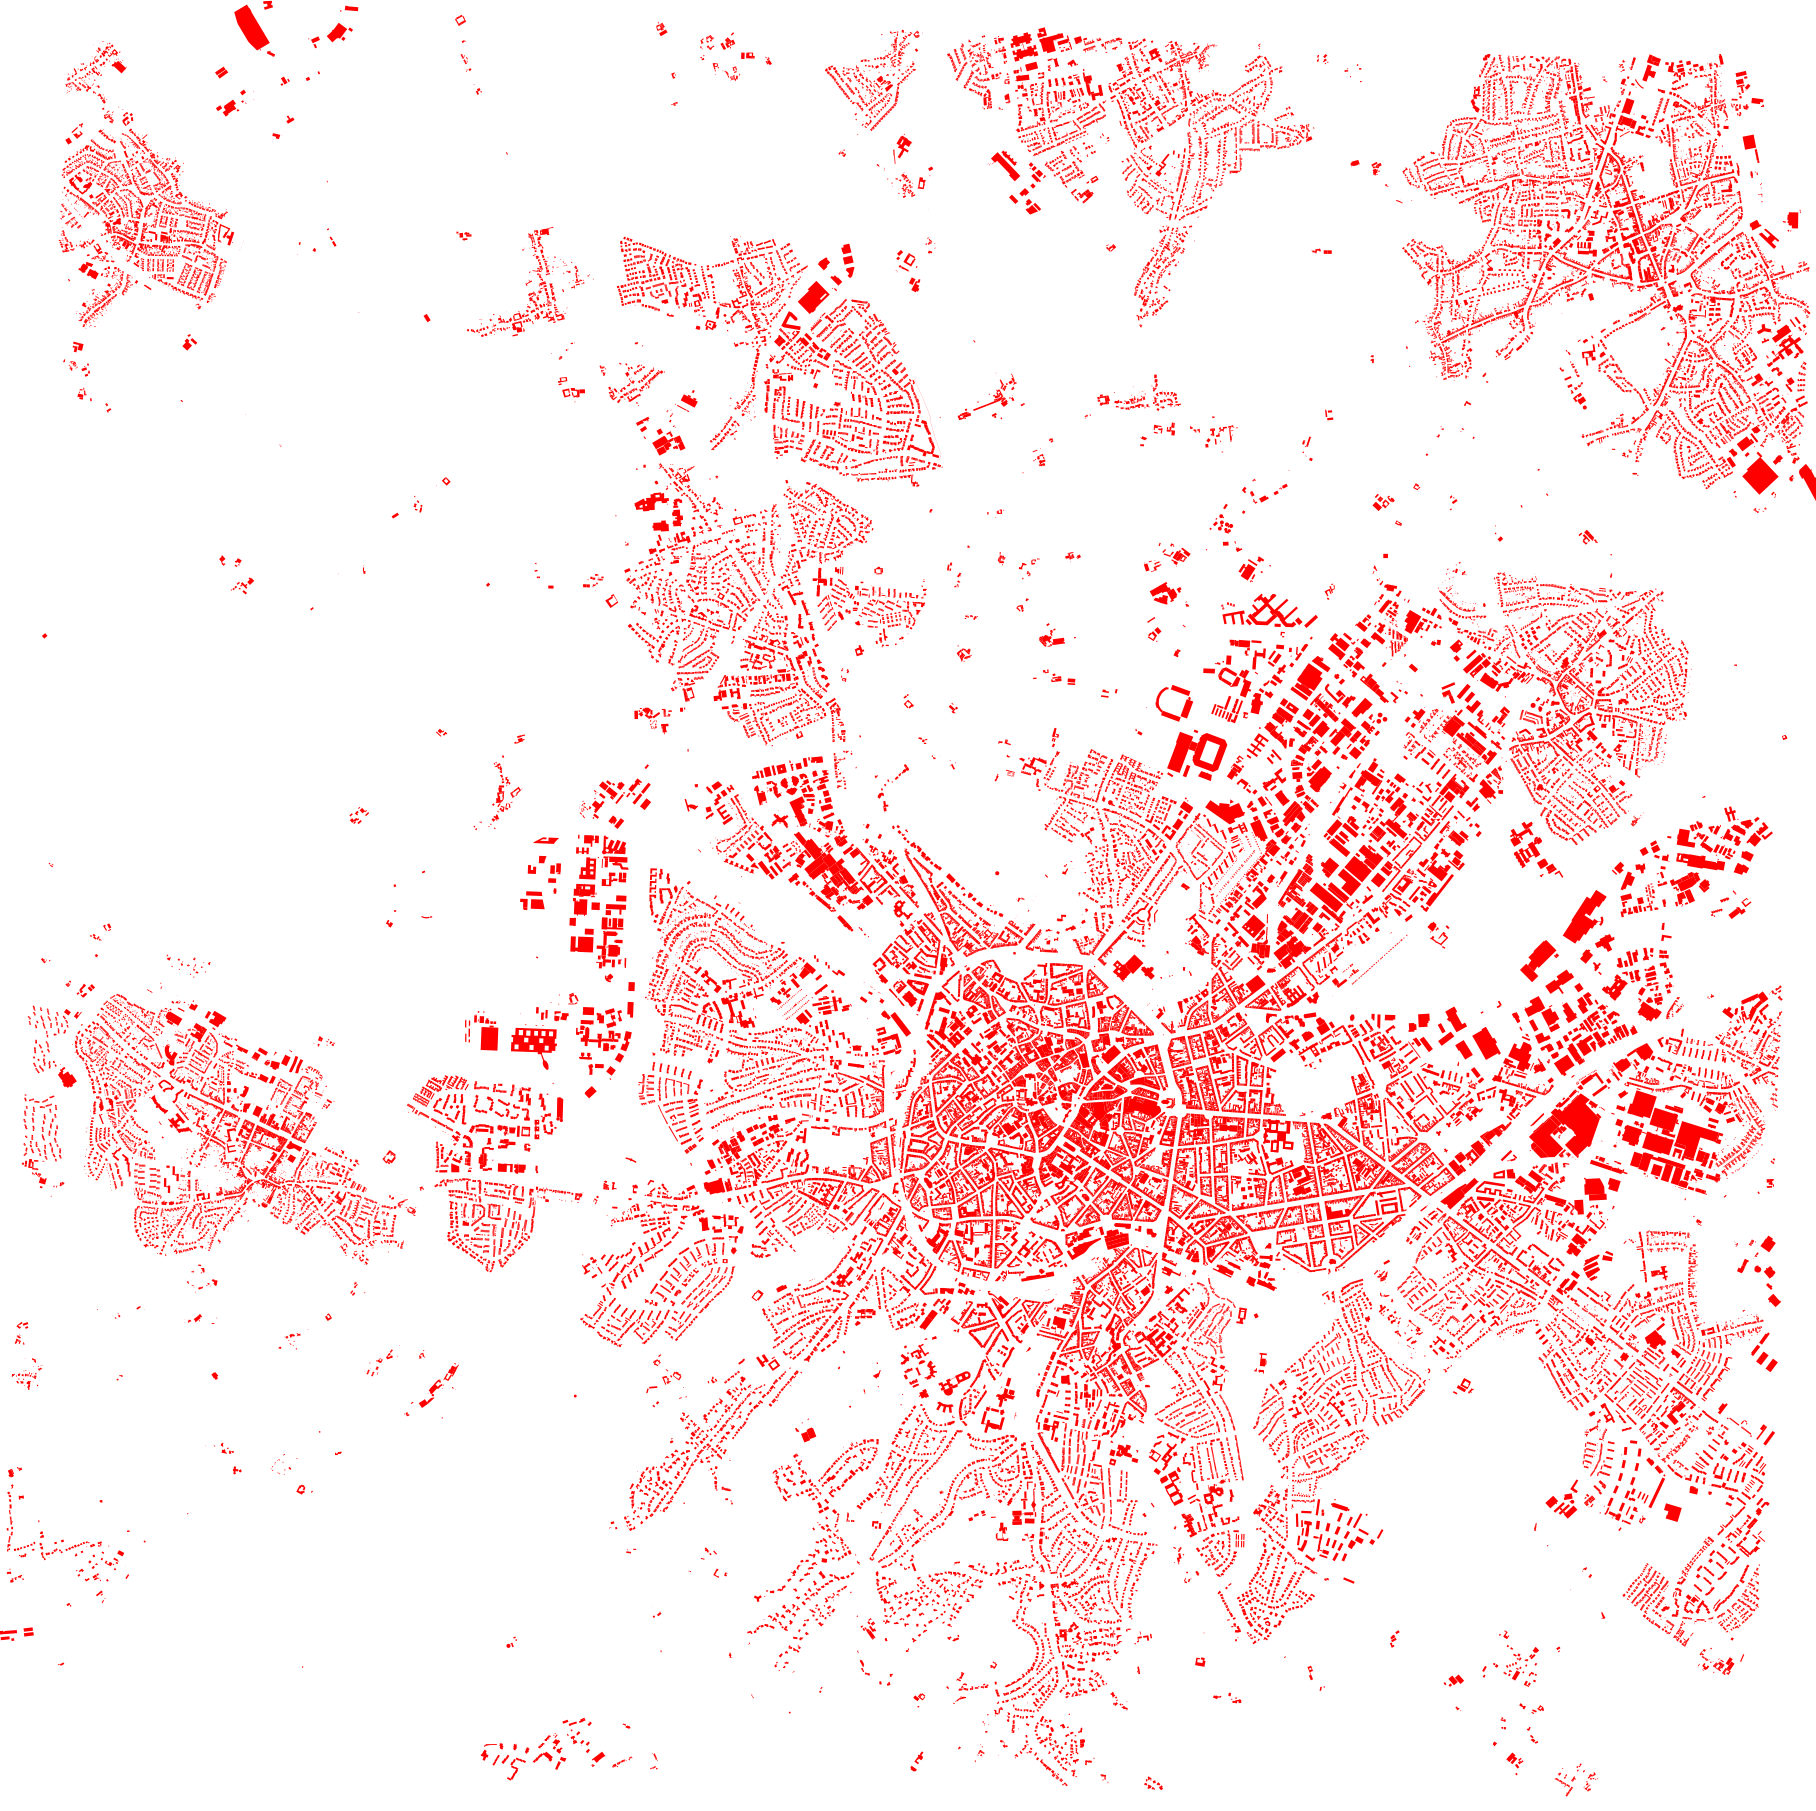

In [8]:
#Quering OSM by using the defined point.
#This figure ground plan captures all the buildings or highway at a distance of 5km from city center.
bbox = ox.utils_geo.bbox_from_point(point=point, dist=dist, project_utm=True)
fp = f"./aachen_col_schwarzplan.png"
#Generating figure ground plan for the city of aachen and colouring all the buildings as red and everything in the background as white
fig, ax = ox.plot_footprints(
    gdf_proj,
    bbox=bbox,
    bgcolor="white",
    color="red",
    filepath=fp,
    dpi=300,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

In [9]:
#Creating an interactive map for aachen using iphyleaflet and my house coordinates as a point of reference.
center = (50.784641, 6.073392)
map_aachen = Map(center=center, zoom=11)
map_aachen

Map(center=[50.784641, 6.073392], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

## (2) Searching for data on sustainable energy in and around the aachen

In [10]:
#In this second part of the exercise, again the chosen city is aahen. 
#For this city, new data of renewable energies, particularly, wind turbines in and around the city of aachen are queried using OSM data.
#Further, these locations of wind turbines along with the location of my house are marked in the interactive map and few messages are added for these locations.

In [11]:
#Now, for the renewable energies, wind turbine is selected as the type of generator method.
#Defining tag for this 'wind turbine' renewable energy. OSM data for all the wind turbines at a distance of 5km from my house location are queried.
tag = {"generator:method" : "wind_turbine"}
#The value of point here is the aachen city center coordinates.
point = (50.784641, 6.073392)
dist = 5000
gdf2 = ox.geometries_from_point(point, tag, dist=dist)
gdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 9 entries, ('node', 161839399) to ('node', 6236767248)
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   generator:method              9 non-null      object  
 1   generator:source              9 non-null      object  
 2   power                         9 non-null      object  
 3   geometry                      9 non-null      geometry
 4   website                       4 non-null      object  
 5   generator:output:electricity  2 non-null      object  
 6   name                          1 non-null      object  
 7   wikidata                      1 non-null      object  
 8   wikipedia                     1 non-null      object  
 9   height                        2 non-null      object  
 10  manufacturer                  2 non-null      object  
 11  model                         2 non-null      object  
 12  rotor:dia

In [12]:
gdf2

generator:method generator:source      power  \
element_type osmid                                                     
node         161839399      wind_turbine             wind  generator   
             161839401      wind_turbine             wind  generator   
             161839402      wind_turbine             wind  generator   
             161839404      wind_turbine             wind  generator   
             161839407      wind_turbine             wind  generator   
             161839412      wind_turbine             wind  generator   
             161839415      wind_turbine             wind  generator   
             4783347502     wind_turbine             wind  generator   
             6236767248     wind_turbine             wind  generator   

                                         geometry  \
element_type osmid                                  
node         161839399   POINT (6.02988 50.80980)   
             161839401   POINT (6.02824 50.81192)   
             161839402   POINT (6.02279 50.81068)   
             161839404   POINT (6.02517 50.80872)   
             161839407   POINT (6.01788 50.80867)   
             161839412   POINT (6.02069 50.80692)   
             161839415   POINT (6.02363 50.80514)   
             4783347502  POINT (6.02852 50.82270)   
             6236767248  POINT (6.02566 50.82531)   

                                                                   website  \
element_type osmid                                                           
node         161839399                                                 NaN   
             161839401   https://aachen-hat-energie.de/wind/eurowindpar...   
             161839402   https://aachen-hat-energie.de/wind/eurowindpar...   
             161839404                                                 NaN   
             161839407   https://aachen-hat-energie.de/wind/eurowindpar...   
             161839412                      https://aachen-hat-energie.de/   
             161839415                                                 NaN   
             4783347502                                                NaN   
             6236767248                                                NaN   

                        generator:output:electricity  \
element_type osmid                                     
node         161839399                           NaN   
             161839401                           NaN   
             161839402                           NaN   
             161839404                           NaN   
             161839407                       1800 kW   
             161839412                       1500 kW   
             161839415                           NaN   
             4783347502                          NaN   
             6236767248                          NaN   

                                                name wikidata  \
element_type osmid                                              
node         161839399                           NaN      NaN   
             161839401                           NaN      NaN   
             161839402                           NaN      NaN   
             161839404                           NaN      NaN   
             161839407                           NaN      NaN   
             161839412   Besucherwindanlage Windfang  Q830736   
             161839415                           NaN      NaN   
             4783347502                          NaN      NaN   
             6236767248                          NaN      NaN   

                                              wikipedia height  \
element_type osmid                                               
node         161839399                              NaN    NaN   
             161839401                              NaN    NaN   
             161839402                              NaN    NaN   
             161839404                              NaN    NaN   
             161839407                              NaN    

In [13]:
gdf3 = gdf2.copy()

In [14]:
# here, we can create a definition(function) to extract x and y of our geometries.
def extract(a):
    return (a.x, a.y)

In [15]:
# we should apply def on the column.
gdf3['geometry'] = gdf3['geometry'].apply(extract)

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1350: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


In [16]:
gdf3.head(7)

generator:method generator:source      power  \
element_type osmid                                                    
node         161839399     wind_turbine             wind  generator   
             161839401     wind_turbine             wind  generator   
             161839402     wind_turbine             wind  generator   
             161839404     wind_turbine             wind  generator   
             161839407     wind_turbine             wind  generator   
             161839412     wind_turbine             wind  generator   
             161839415     wind_turbine             wind  generator   

                                       geometry  \
element_type osmid                                
node         161839399  (6.0298829, 50.8098032)   
             161839401  (6.0282356, 50.8119246)   
             161839402  (6.0227941, 50.8106838)   
             161839404  (6.0251722, 50.8087162)   
             161839407  (6.0178778, 50.8086691)   
             161839412  (6.0206898, 50.8069203)   
             161839415  (6.0236314, 50.8051434)   

                                                                  website  \
element_type osmid                                                          
node         161839399                                                NaN   
             161839401  https://aachen-hat-energie.de/wind/eurowindpar...   
             161839402  https://aachen-hat-energie.de/wind/eurowindpar...   
             161839404                                                NaN   
             161839407  https://aachen-hat-energie.de/wind/eurowindpar...   
             161839412                     https://aachen-hat-energie.de/   
             161839415                                                NaN   

                       generator:output:electricity  \
element_type osmid                                    
node         161839399                          NaN   
             161839401                          NaN   
             161839402                          NaN   
             161839404                          NaN   
             161839407                      1800 kW   
             161839412                      1500 kW   
             161839415                          NaN   

                                               name wikidata  \
element_type osmid                                             
node         161839399                          NaN      NaN   
             161839401                          NaN      NaN   
             161839402                          NaN      NaN   
             161839404                          NaN      NaN   
             161839407                          NaN      NaN   
             161839412  Besucherwindanlage Windfang  Q830736   
             161839415                          NaN      NaN   

                                             wikipedia height manufacturer  \
element_type osmid                                                           
node         161839399                             NaN    NaN          NaN   
             161839401                             NaN    NaN          NaN   
             161839402                             NaN    NaN          NaN   
             161839404                             NaN    NaN          NaN   
             161839407                             NaN    NaN          NaN   
             161839412  de:Besucherwindanlage Windfang    NaN          NaN   
             161839415                             NaN    NaN          NaN   

                       model rotor:diameter  
element_type osmid                           
node         161839399   NaN            NaN  
             161839401   NaN            NaN  
             161839402   NaN            NaN  
             161839404   NaN            NaN  
             161839407   NaN            NaN  
             161839412   NaN            NaN  
             161839415   NaN            NaN

<AxesSubplot:>

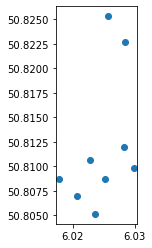

In [17]:
#Extracting all elements which are wind turbine and plotting them on the graph.
gdf2[gdf2['generator:method'] == "wind_turbine"].plot()

In [18]:
# here we can choose one point.
gdf4 = gdf2.iloc[:1]
gdf4

,,generator:method,generator:source,power,geometry,website,generator:output:electricity,name,wikidata,wikipedia,height,manufacturer,model,rotor:diameter
element_type,osmid,,,,,,,,,,,,,
node,161839399,wind_turbine,wind,generator,POINT (6.02988 50.80980),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## (3) Visualize the data in an interactive map with the library Python Ipyleaflet

In [19]:
#Setting up a map called aachen_turbine, with an appropriate zoom , for showing all the wind turbine location and my house on an interactive map.
aachen_windturbine = Map(center= point, zoom = 11)
icon = Icon(icon_url='https://raw.githubusercontent.com/Hosseinabdeyazd/Icon-Wind/c72dcc740473181177801ce4504f409020290c4f/25694.png', icon_size=[35, 35], icon_anchor=[0,0])
mark = Marker(location=point, icon=icon, rotation_angle=0, rotation_origin='22px 94px')
aachen_windturbine.add_layer(mark);
aachen_windturbine



Map(center=[50.784641, 6.073392], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

In [20]:
windurbine_location = gdf4.iloc[0]['geometry']
windurbine_coordinate = (windurbine_location.y , windurbine_location.x)
icon = Icon(icon_url='https://github.com/Hosseinabdeyazd/Icon-Wind/blob/main/2076-200%20(2).png?raw=true', icon_size=[35, 35], icon_anchor=[0,0])
mark = Marker(location=windurbine_coordinate , icon=icon, rotation_angle=0, rotation_origin='22px 94px')
aachen_windturbine.add_layer(mark);
aachen_windturbine

Map(center=[50.784641, 6.073392], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

In [21]:
#Attention, getting the whole of Aachen takes many minutes, we will get the inner city only
G = ox.graph_from_point(point, dist=2000, network_type="walk")

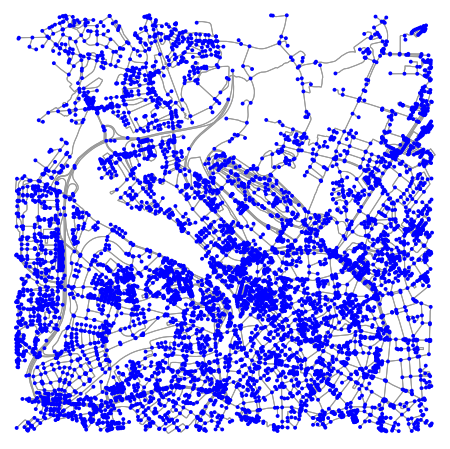

In [22]:
# Let us get out our graph from OSM first
ax, fig = ox.plot_graph(G, node_color='b', node_zorder=1, bgcolor='#FFFFFF')

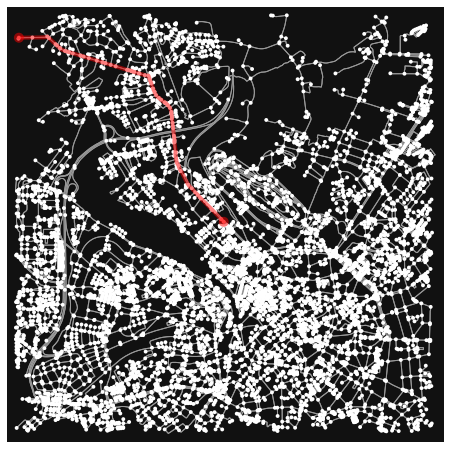

In [23]:
#Set start and end point (value)
start = ox.nearest_nodes(G, point[1], point[0])
dest  = ox.nearest_nodes(G, windurbine_coordinate[1], windurbine_coordinate[0])

#Calculate the shortest path between start and end point
route_nodes = ox.shortest_path(G, start, dest)

fig, ax = ox.plot_graph_route(G, route_nodes);
fig.savefig('world.jpg');

In [ ]:
def generate_multindex(route_nodes):
    multiindex_list = []
    # append the index to list
    for u, v in zip(route_nodes[:-1], route_nodes[1:]):
        multiindex_list.append((u, v, 0))
    return multiindex_list

# get edges from from above multidigraph
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

# generate multiindex based on generated shortest route
multiindex_list = generate_multindex(route_nodes)
# fetch edge details based on multi index list
shrt_gdf_edges = gdf_edges[gdf_edges.index.isin(multiindex_list)]
# plot the shortest route on map
shrt_gdf_edges.explore(color="blue")

In [ ]:
# Create the Polyline object for the route and add to previous map
route_coords = []
for node in route_nodes:
    node_location = G.nodes[node]
    route_coords.append([node_location['y'], node_location['x']])
walk_way = Polyline(
    locations=route_coords,
    color='blue',
    transform=False,
    draggable=False,
    fill_color=None,
    fill_opacity=0,
    weight=3
)
aachen_windturbine.add_layer(walk_way)
aachen_windturbine